In [7]:
#1)Проверьте утверждение, что «Мужчины и женщины 50% своего дохода тратят в
#супермаркетах» .

In [8]:
import time
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [12]:
df = pd.read_csv("Mall_Customers.csv")
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [11]:
#С УЧЕТОМ alpha
# Определение Spending Score для мужчин и женщин
male_spending_score = df[df['Genre'] == 'Male']['Spending Score (1-100)']
female_spending_score = df[df['Genre'] == 'Female']['Spending Score (1-100)']

# Уровень значимости
alpha = 0.05

# Проведение t-теста на равенство средних для мужчин и женщин
t_statistic_, p_value_men = stats.ttest_1samp(male_spending_score, 50)
print(t_statistic, p_value_men)
t_statistic, p_value_women = stats.ttest_1samp(female_spending_score, 50)
print(t_statistic, p_value_women)
t_statistic, p_value = stats.ttest_ind(male_spending_score, female_spending_score) #Не по заданию, просто двухсторонний тест
print(t_statistic, p_value)

# Средние значения
mean_male_spending = male_spending_score.mean()
mean_female_spending = female_spending_score.mean()

# Создаем массив значений t
# Создаем плотность распределения t-Стюдента
pdf_men = stats.t.pdf(t_values, df=len(male_spending_score) - 1)
pdf_women = stats.t.pdf(t_values, df=len(female_spending_score) - 1)

# Подготовка графиков
plt.figure(figsize=(14, 6))

# График для мужчин
plt.subplot(1, 2, 1)
plt.plot(t_values, pdf_men, label='Распределение t-Стюдента (Мужчины)', color='blue')
plt.axvline(x=t_statistic_men, color='red', linestyle='--', label='t-статистика (Мужчины)')
# Обозначение p-значения
plt.fill_between(t_values, pdf_men, where=(t_values <= t_statistic_men), color='gray', alpha=0.5)
plt.title('Распределение t-Стюдента для мужчин')
plt.xlabel('t-значение')
plt.ylabel('Плотность')
plt.legend()
plt.grid()

# График для женщин
plt.subplot(1, 2, 2)
plt.plot(t_values, pdf_women, label='Распределение t-Стюдента (Женщины)', color='purple')
plt.axvline(x=t_statistic_women, color='red', linestyle='--', label='t-статистика (Женщины)')
# Обозначение p-значения
plt.fill_between(t_values, pdf_women, where=(t_values <= t_statistic_women), color='gray', alpha=0.5)
plt.title('Распределение t-Стюдента для женщин')
plt.xlabel('t-значение')
plt.ylabel('Плотность')
plt.legend()
plt.grid()

# Показать графики
plt.tight_layout()
plt.show()
# Результаты
resultTask11 = {
    'Mean Male Spending Score': mean_male_spending,
    'P-Value Male': p_value_men,
    'Reject Null Hypothesis Male': p_value_men < alpha,
    'Mean Female Spending Score': mean_female_spending,
    'P-Value Female': p_value_women,
    'Reject Null Hypothesis Female': p_value_women < alpha,
    'p_value': p_value
}

# Печать результатов
resultTask11

NameError: name 't_statistic' is not defined

In [ ]:
#Немного другая задача, здесь проверяется гипотеза о двух выборках
# Размеры выборок
n1 = len(male_spending_score)
n2 = len(female_spending_score)

# Средние значения
mean_male = male_spending_score.mean()
mean_female = female_spending_score.mean()

# Стандарные отклонения
s1 = male_spending_score.std(ddof=1)
s2 = female_spending_score.std(ddof=1)

# Уровень значимости
alpha = 0.05

# Объединенное стандартное отклонение
S_p = np.sqrt(((n1 - 1) * s1**2 + (n2 - 1) * s2**2) / (n1 + n2 - 2))

# t-статистика
t_statistic = (mean_male - mean_female) / (S_p * np.sqrt(1/n1 + 1/n2))

# Критические значения для двухстороннего теста
t_critical = stats.t.ppf(1 - alpha/2, df=n1 + n2 - 2)

# Результаты
resultTask12 = {
    'Mean Male Spending Score': mean_male,
    'Mean Female Spending Score': mean_female,
    't-statistic': t_statistic,
    'Critical Value': t_critical,
    'Reject Null Hypothesis': abs(t_statistic) > t_critical
}

# Печать результатов
resultTask12

{'Mean Male Spending Score': 48.51136363636363,
 'Mean Female Spending Score': 51.526785714285715,
 't-statistic': -0.8190464150660334,
 'Critical Value': 1.9720174778338955,
 'Reject Null Hypothesis': False}

In [ ]:
# двусторонний Z-тест для сравнения пропорций или средних значений двух независимых групп
p_male = df[df['Genre'] == 'Male']['Spending Score (1-100)'].mean()
p_female = df[df['Genre'] == 'Female']['Spending Score (1-100)'].mean()

n_male = df[df['Genre'] == 'Male']['Spending Score (1-100)'].count()
n_female = df[df['Genre'] == 'Female']['Spending Score (1-100)'].count()

# Пропорция, которую хотим проверить
p_0 = 0.5

# Вычисляем Z-статистику
Z_statistic = (p_male - p_female) / ((p_0 * (1 - p_0) * (1/n_male + 1/n_female)) ** 0.5)

# Найдем p-значение для двустороннего теста
p_value = 2 * (1 - stats.norm.cdf(abs(Z_statistic)))

# Уровень значимости
alpha = 0.05

# Результаты
print("Выборочная пропорция мужчин:", p_male)
print("Выборочная пропорция женщин:", p_female)
print("Z-статистика:", Z_statistic)
print("p-значение:", p_value)

# Проверка гипотезы
if p_value < alpha:
    print("Отвергаем нулевую гипотезу: мужчины и женщины расходуют свои деньги неравномерно.")
else:
    print("Не отвергаем нулевую гипотезу: мужчины и женщины расходуют свои деньги равномерно.")


Выборочная пропорция мужчин: 48.51136363636363
Выборочная пропорция женщин: 51.526785714285715
Z-статистика: -42.336354154755554
p-значение: 0.0
Отвергаем нулевую гипотезу: мужчины и женщины расходуют свои деньги неравномерно.


In [ ]:
#2 Проверьте утверждение, что «Доход у мужчин больше, чем у женщин» с уровнем
#значимости 5%.

t-статистика: 0.795022298602198, p-значение: 0.21377624699963932


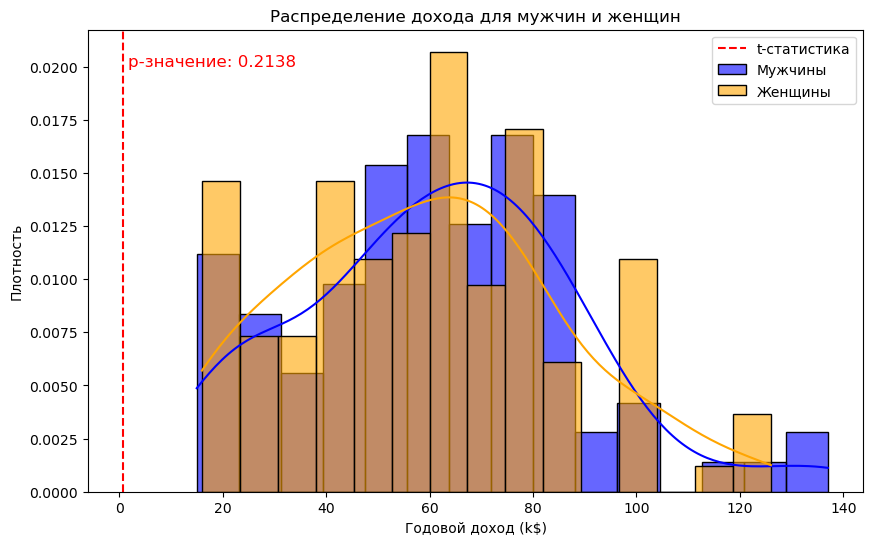

In [ ]:
import seaborn as sns
# Разделение данных на две группы
male_income = df[df['Genre'] == 'Male']['Annual Income (k$)']
female_income = df[df['Genre'] == 'Female']['Annual Income (k$)']

# Проведение t-теста
t_stat, p_value = stats.ttest_ind(male_income, female_income, alternative='greater')

# Уровень значимости
alpha = 0.05

# Проверка условия
if p_value < alpha:
    resultTask2 = "Отвергаем нулевую гипотезу"
else:
    resultTask2 = "Не удается отвергнуть нулевую гипотезу"

print(f"t-статистика: {t_stat}, p-значение: {p_value}")
resultTask2
plt.figure(figsize=(10, 6))

# Гистограмма дохода для мужчин и женщин
sns.histplot(male_income, color='blue', kde=True, label='Мужчины', stat='density', bins=15, alpha=0.6)
sns.histplot(female_income, color='orange', kde=True, label='Женщины', stat='density', bins=15, alpha=0.6)

# Добавление линий для t-статистики
plt.axvline(x=t_stat, color='red', linestyle='--', label='t-статистика')

# Заголовки и легенда
plt.title('Распределение дохода для мужчин и женщин')
plt.xlabel('Годовой доход (k$)')
plt.ylabel('Плотность')
plt.legend()

# Добавление текста с p-значением
plt.text(t_stat + 1, 0.02, f'p-значение: {p_value:.4f}', color='red', fontsize=12)

plt.show()

In [ ]:
# Зададим известные стандартные отклонения
sigma_male = male_income.std(ddof=1)
sigma_female = female_income.std(ddof=1)
# Разделение данных на две группы
male_income = df[df['Genre'] == 'Male']['Annual Income (k$)']
female_income = df[df['Genre'] == 'Female']['Annual Income (k$)']

# Вычисление средних
mean_male = male_income.mean()
mean_female = female_income.mean()

n1 = len(male_income)
n2 = len(female_income)

# Расчет Z-статистики
Z = (mean_male - mean_female) / ((sigma_male**2 / n1) + (sigma_female**2 / n2))**0.5

# Уровень значимости
alpha = 0.05

# Критическое значение Z для одностороннего теста
Z_critical = stats.norm.ppf(1 - alpha) #пороговое значение Z

# Результаты
print(f"Z-статистика: {Z}, критическое значение: {Z_critical}")

if Z > Z_critical:
    resultTask2 = "Отвергаем нулевую гипотезу"
else:
    resultTask2 = "Не удается отвергнуть нулевую гипотезу"

print(resultTask2)

Z-статистика: 0.7927442280257677, критическое значение: 1.6448536269514722
Не удается отвергнуть нулевую гипотезу


In [ ]:
#Проверьте гипотезу, что неоднородность возрастов женщин такая же как у мужчин, т. е. что
#дисперсии возраста женщин равна дисперсии возраста мужчин.


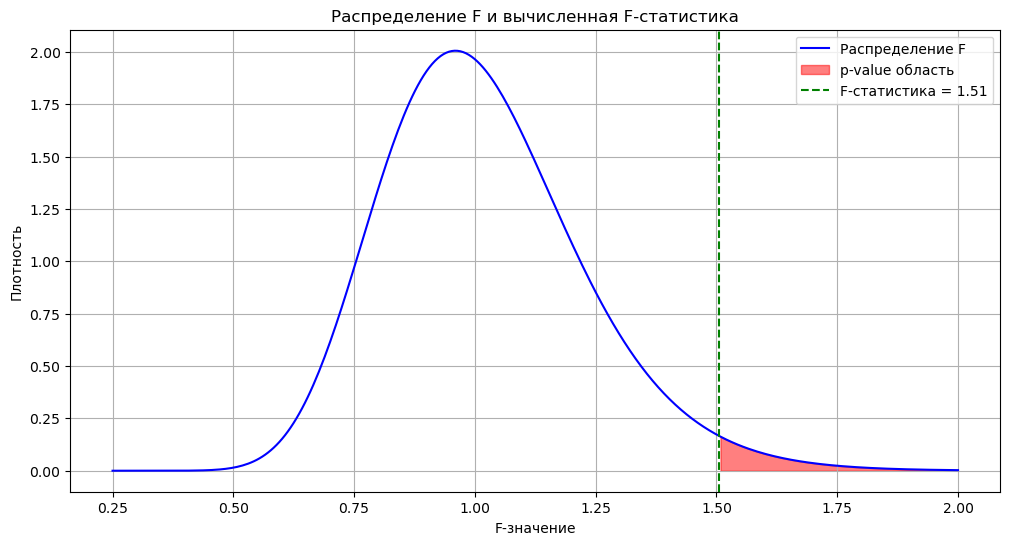

Дисперсия мужчин: 240.70937826541268
Дисперсия женщин: 159.87314993564993
F-статистика: 1.5056272949041156
p-значение: 0.020997737174430653
Отвергаем нулевую гипотезу: дисперсии значимо различны.


In [ ]:
from scipy.stats import f
# Разделяем данные на две выборки: возраст мужчин и женщин
ages_male = df[df['Genre'] == 'Male']['Age']
ages_female = df[df['Genre'] == 'Female']['Age']

# Рассчитываем дисперсии
var_male = ages_male.var(ddof=1)  # ddof=1 для выборочной дисперсии
var_female = ages_female.var(ddof=1)


# Степени свободы
n_male = len(ages_male)
n_female = len(ages_female)
df_male = n_male - 1
df_female = n_female - 1


# Значение F-статистики
F_statistic = var_male / var_female

# Создаем график распределения
x = np.linspace(0.25, 2, 300)
y = f.pdf(x, df_male, df_female)

plt.figure(figsize=(12, 6))

# График функции плотности распределения Фишера
plt.plot(x, y, label='Распределение F', color='blue')
plt.fill_between(x, y, where=(x >= F_statistic), color='red', alpha=0.5, label='p-value область')

# Обозначаем F-статистику на графике
plt.axvline(F_statistic, color='green', linestyle='--', label=f'F-статистика = {F_statistic:.2f}')

# Добавляем аннотации и заголовок
plt.title('Распределение F и вычисленная F-статистика')
plt.xlabel('F-значение')
plt.ylabel('Плотность')
plt.legend()
plt.grid()
plt.show()

# Получаем p-значение
p_value = 1 - stats.f.cdf(F_statistic, df_male, df_female)

# Уровень значимости
alpha = 0.05

# Результаты
print("Дисперсия мужчин:", var_male)
print("Дисперсия женщин:", var_female)
print("F-статистика:", F_statistic)
print("p-значение:", p_value)
# Проверка гипотезы
if p_value < alpha:
    print("Отвергаем нулевую гипотезу: дисперсии значимо различны.")
else:
    print("Не отвергаем нулевую гипотезу: дисперсии не значимо различны.")

In [ ]:
#4 Выяснить, какие функции для проверки параметрических гипотез есть python-пакете
#statsmodels.stats.

In [ ]:
#T-tests:
#ttest_ind: Тест для сравнения средних значений двух независимых выборок.
t_stat, p_value, _ = ttest_ind(sample1, sample2)
#Тест для сравнения средних значений двух зависимых выборок (с matched pairs).
t_stat, p_value, _ = ttest_rel(sample1, sample2)
#Z-тесты:
#ztest: Тест для сравнения средних двух выборок, используемый для больших выборок (использует нормальное распределение).
stat, p_value = proportions_ztest(counts, nobs)
#Тесты для пропорций:
#proportions_ztest: Как упомянуто, используется для проверки пропорций, охватывает как одну выборку, так и две.
count = np.array([success_male, success_female])
nobs = np.array([total_male, total_female])
stat, p_value = proportions_ztest(count, nobs)
#ANOVA (дисперсионный анализ):
#f_oneway: Однофакторный дисперсионный анализ для проверки разницы средних более чем одной группы.
f_stat, p_value = f_oneway(group1, group2, group3)
#Критерий согласия хи-квадрат:chisquare: Тест для проверки, соответствует ли наблюдаемое распределение ожидаемому.
chi2_stat, p_value = chisquare(observed, expected)
#Коэффициенты корреляции:
#pearsonr: Тест для проверки корреляции Пирсона между двумя переменными.
test_stat, p_value = jarque_bera(data)


NameError: name 'ttest_ind' is not defined